Link: https://github.com/ultralytics/ultralytics/issues/3137

In [12]:
import cv2
import numpy as np
from PIL import Image, ImageDraw,ImageFont
import random
from matplotlib import pyplot as plt

In [13]:
import warnings
# Filter out the DeprecationWarning related to textsize in Pillow
warnings.filterwarnings("ignore", category=DeprecationWarning, module="PIL.ImageDraw")

In [14]:
# # Custom
# def cv2_imshow(image):
#     # Convert the image from BGR to RGB color space
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Create a figure and axes
#     fig, ax = plt.subplots()

#     # Display the image
#     ax.imshow(image_rgb)

#     # Remove the axis labels
#     ax.axis('off')

#     # Show the plot
#     plt.show()

In [15]:
# Google colab
# Link: https://github.com/googlecolab/colabtools/blob/main/google/colab/patches/__init__.py

import cv2
from IPython import display
import PIL


def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks.
  Args:
    a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. For
      example, a shape of (N, M, 3) is an NxM BGR color image, and a shape of
      (N, M, 4) is an NxM BGRA color image.
  """
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display.display(PIL.Image.fromarray(a))

In [16]:
image_path="./trainPart/69f1cf659b0d39e304200c53af53aabc.jpg" # path of the image, change it
annotation_path="./trainPartTxtMainLabels/69f1cf659b0d39e304200c53af53aabc.txt" #path of the annotation text file, change it

In [17]:
# The Helper functions below assume that the image size is (640,640).Hence resizing the image.
#Open the image
img = Image.open(image_path) 
# width, height = img.size

#Resize the image to 640 by 640
img = img.resize((1280, 1280))
#if you want then you can save the resized image by img.save('resized_image.jpg')

# <--------- Helper functions starts here ----------------------------------->
def maskVisualize(image,mask):
  fontsize = 20
  f, ax = plt.subplots(1, 2, figsize=(25, 15))
  ax[0].axis('off')
  ax[0].imshow(image)
  ax[1].axis('off')
  ax[1].imshow(mask)

#Define the boundary coordinates as a list of (x, y) tuples
'''
def draw_points_on_image(image, points):
  #resize image to 640*640
  resimg = cv2.resize(image, (640,640))
  #iterate for each mask
  for mask in points:
    #Draw each point on the image
    for point in mask:
        cv2.circle(resimg, tuple(point), 1, (0,0,255), -1,)
  #Display the image
  cv2_imshow(resimg)
'''

'\ndef draw_points_on_image(image, points):\n  #resize image to 640*640\n  resimg = cv2.resize(image, (640,640))\n  #iterate for each mask\n  for mask in points:\n    #Draw each point on the image\n    for point in mask:\n        cv2.circle(resimg, tuple(point), 1, (0,0,255), -1,)\n  #Display the image\n  cv2_imshow(resimg)\n'

In [18]:
#convert the mask from the txt file(annotation_path is path of txt file) to array of points making that mask.
def generate_points(annotation_path=''):
  labels=[] # this will store labels
  #we are assuming that the image is of dimension (640,640). then you have annotated it.
  with open(annotation_path, "r") as file:
    points=[]
    for line in file:
      label,lis=line.split()[0],line.split()[1:]
      labels.append(label)
      lis=list(map(float,lis))
      for i in range(len(lis)):
        lis[i]=int(lis[i]*1280) # width should be placed
      newlis=[]
      i=0
      while(i<len(lis)):
        #appendint the coordinates as a tuple (x,y)
        newlis.append((lis[i],lis[i+1]))
        i+=2
      points.append(newlis)
    return labels,points

In [19]:
# 46 colors
colors = ["Red", "Blue", "Green", "Yellow", "Orange", "Purple", "Pink", "Brown",
          "Gray", "Midnight blue", "White", "Cyan", "Magenta", "Teal", "Turquoise",
          "Gold", "Silver", "Indigo", "Maroon", "Olive", "Lime", "Navy", "Salmon",
          "Coral", "Lavender", "Periwinkle", "Mauve", "Azure", "Mint", "Peach",
          "Rose","Slate", "Plum", "Tan", "Beige", "Ivory", "Lilac", "Mustard",
          "Ruby", "Sapphire", "Emerald", "Amber", "Pearl", "Copper", "Ruby", "Bronze",]

# 27 colors
colors1 = ['AliceBlue', 'AntiqueWhite', 'Aqua', 'Aquamarine', 'Azure', 'Beige', 'Bisque',
           'BlanchedAlmond', 'Blue', 'BlueViolet', 'Brown', 'BurlyWood', 'CadetBlue',
           'Chartreuse', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan', 'DarkCyan',
           'DarkGoldenRod', 'DarkKhaki', 'DarkOliveGreen', 'DarkOrange', 'DarkSeaGreen',
           'DarkTurquoise', 'DarkViolet', 'DeepSkyBlue'
]


color_hash = {
    1: 'AliceBlue',
    2: 'AntiqueWhite',
    3: 'Aqua',
    4: 'Aquamarine',
    5: 'Azure',
    6: 'Beige',
    7: 'Bisque',
    8: 'BlanchedAlmond',
    9: 'Blue',
    10: 'BlueViolet',
    11: 'Brown',
    12: 'BurlyWood',
    13: 'CadetBlue',
    14: 'Chartreuse',
    15: 'Coral',
    16: 'CornflowerBlue',
    17: 'Cornsilk',
    18: 'Crimson',
    19: 'Cyan',
    20: 'DarkMagenta',
    21: 'DarkGoldenRod',
    22: 'DarkKhaki',
    23: 'DarkOliveGreen',
    24: 'DarkOrange',
    25: 'DarkSeaGreen',
    26: 'DarkTurquoise',
    27: 'DarkViolet',
}

colors_hexa = ["#FF0000", "#FF4500", "#FF8C00", "#FFA500", "#FFD700", "#FFFF00", "#ADFF2F",
               "#7FFF00", "#00FF00", "#32CD32", "#00FA9A", "#00FFFF", "#40E0D0", "#00CED1",
               "#00BFFF", "#1E90FF", "#4169E1", "#0000FF", "#6A5ACD", "#8A2BE2", "#9932CC",
               "#8B008B", "#EE82EE", "#FF00FF", "#DA70D6", "#FF1493", "#FF69B4", "#FFB6C1",
               "#FFC0CB", "#FFDAB9", "#FFE4B5", "#FFE4C4", "#FFDAB9", "#FFFACD", "#FAFAD2",
               "#FFF8DC", "#FFEBCD", "#FFEFD5", "#FFF5EE", "#F5F5DC", "#FAEBD7", "#F0FFF0",
               "#F0FFFF", "#F0F8FF", "#F8F8FF", "#F5F5F5"]

In [20]:
#the below function convert the boundary coordinates to mask array (it shows mask if you pass 1 at show)
#the mask array is required when we want to augument the mask also using albumentation
def convert_boundary_to_mask_array(labels,points, show=0):
  #Create a new image with the same size as the desired mask
  # mask = Image.new("L", (640, 640), 0)
  mask = Image.new("RGB", (1280, 1280), 255)
  draw = ImageDraw.Draw(mask)
  for i, boundary_coords in enumerate(points):
    #boundary_coords represent boundary of one polygon
    #Draw the boundary on the mask image
    draw.polygon(boundary_coords,fill=colors1[i % len(colors1)])
    # draw.polygon(boundary_coords, fill=color_hash[labels[i]])
    #Also put the label as text 
    #Compute the centroid of the polygon
    centroid_x = sum(x for x, _ in boundary_coords) / len(boundary_coords)
    centroid_y = sum(y for _, y in boundary_coords) / len(boundary_coords)
    centroid = (int(centroid_x), int(centroid_y))
    #Write the name at the centroid
    text = str(labels[i])
    #Write the label at the centroid
    font_size = 24  # Specify the desired font size
    font = ImageFont.truetype("arial.ttf", font_size) # use a specific font and size
    # font = ImageFont.load_default()
    # text_w, text_h = draw.textsize(text, font=font)
    text_w, text_h = font.getsize(text)
    text_pos = (centroid[0] - text_w/2, centroid[1] - text_h/2)
    draw.text(text_pos, text, font=font, fill='white')
  #Convert the mask image to a numpy array
  mask_array = np.array(mask)*255
  #Show the mask image
  if(show==1):
    #Image.fromarray(mask_array).show()
    cv2_imshow(mask_array)
  return mask_array

In [21]:
#function that takes mask path (yolov8 seg txt file) and return mask of an image (shape of mask == shape of image)
def generate_mask(annotation_path='',show=0):
  #pass show=1 for showing the generated mask
  #firstly we generate the points (coordinates) from the annotations
  labels,points=generate_points(annotation_path)
  #once we get the points we will now generate the mask image from these points (binary mask image (black/white))
  #mask is represented by white and ground is represented as black
  mask_array=convert_boundary_to_mask_array(labels,points,show)
  return mask_array
# <---------- Helper Functions Ends here ------------------------------------------------------------->

/tmp/ipykernel_116807/1015287776.py:25: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_w, text_h = font.getsize(text)


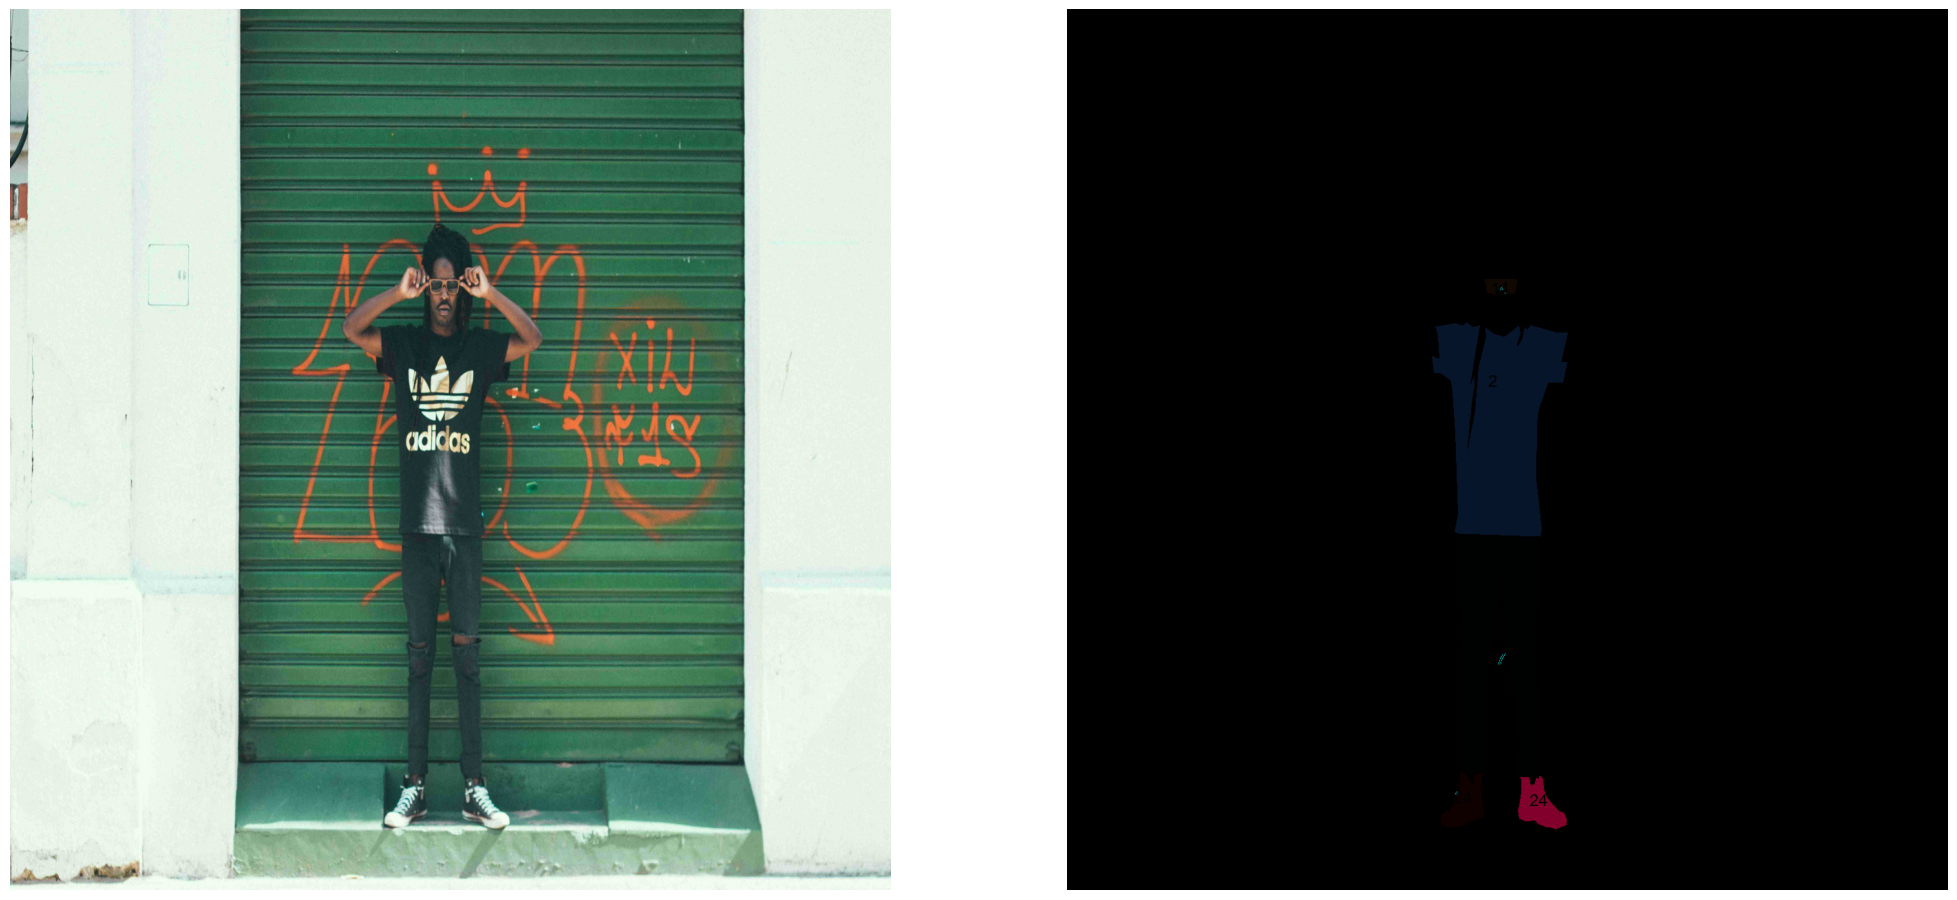

In [22]:

mask_array=generate_mask(annotation_path=annotation_path,show=0)
maskVisualize(np.array(img),mask_array)

In [23]:
# import cv2
# import numpy as np
# from random import randint

# with open(annotation_path, 'r') as f:
#     labels = f.read().splitlines()
# img = cv2.imread(image_path)
# h,w = img.shape[:2]

# for label in labels:
#     class_id, *poly = label.split(' ')
    
#     poly = np.asarray(poly,dtype=np.float16).reshape(-1,2) # Read poly, reshape
#     poly *= [w,h] # Unscale
    
#     cv2.polylines(img, [poly.astype('int')], True, (randint(0,255),randint(0,255),randint(0,255)), 2) # Draw Poly Lines
#     # cv2.fillPoly(img, [poly.astype('int')], (randint(0,255),randint(0,255),randint(0,255)), cv2.LINE_AA) # Draw area

    
#     plt.imshow(img)
#     plt.show()
#     # cv2.imshow('img with poly', img)
#     # cv2.waitKey(0)